In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
%matplotlib inline

In [83]:
df = pd.read_csv('../data/train.csv', index_col='Id', low_memory=False)

In [84]:
# Function for displaying all columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

display_all(df.tail().transpose())

Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,Inside,Inside,Inside,Inside


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## Missing values and encoding categorical variables

From looking at variable descriptions we can assume that all null values are just feature values that certain houses don't have. For example basement quality of house with no basement is marked as missing value, whereas in reality it is information that can help predict the house price. Therefore I'm not going to drop na values but replace them.

I will replace fields with NA with 0 in case of numerical variables and with "NA" string in case of categorical variables, in order to use GetDummies for encoding categorical variables.

In [86]:
# Get list of float variables
floats = (df.dtypes == 'float64')
float_cols = list(floats[floats].index)

# Get list of integer variables
integers = (df.dtypes == 'int64')
integer_cols = list(integers[integers].index)

# List of numerical variables
numerical_cols = float_cols + integer_cols
print(numerical_cols)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [87]:
# Replace na values in every numerical variable with 0
for col in numerical_cols:
    df[col] = df[col].fillna(0)

As we can see from above there are lot of categorical variables (objects)

Pandas has a concept of a category data type, but by default it would not turn anything into a category for you. It is important that validation and test sets will use the same category mappings (in other words, if you used 1 for “high” for a training dataset, then 1 should also be for “high” in validation and test datasets).

In [88]:
# Get list of categorical variables
cat = (df.dtypes == 'object')
cat_cols = list(cat[cat].index)
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [89]:
# Replacing missing values in categorical variables with "NA" string
for col in cat_cols:
    df[col] = df[col].fillna("NA")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

Now there are no missing values and we can apply encoding to categorical variables.

When looking at variable decriptions in data_description.txt file, we can see that following columns are clearly ordinal: ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageQual, GarageCond, PoolQC

In [91]:
# All ordinal variables
ordinal = ['BsmtFinType1', 'BsmtFinType2', 'ExterQual', 'Functional', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# Ordinal variables divided into different lists based on category describtions/scales. List contains only one scale.
ordinal1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
ordinal2 = ['BsmtFinType1', 'BsmtFinType2']
ordinal3 = ['Functional']

# Turning ordinal variable data types into categorical
for col in ordinal:
    df[col] = df[col].astype('category')

In [92]:
# Turning every different kind of ordinal feature to correct order
for col in ordinal1:
    df[col].cat.set_categories(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ordered=True, inplace=True)

for col in ordinal2:
    df[col].cat.set_categories(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ordered=True, inplace=True)

for col in ordinal3:
    df[col].cat.set_categories(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    ordered=True, inplace=True)

Below is shown how RandomForest now sees these ordinal variables

In [93]:
df.ExterQual.head()

Id
1    Gd
2    TA
3    Gd
4    TA
5    Gd
Name: ExterQual, dtype: category
Categories (6, object): [NA < Po < Fa < TA < Gd < Ex]

In [94]:
df.BsmtFinType1.head()

Id
1    GLQ
2    ALQ
3    GLQ
4    ALQ
5    GLQ
Name: BsmtFinType1, dtype: category
Categories (7, object): [NA < Unf < LwQ < Rec < BLQ < ALQ < GLQ]

In [95]:
df.Functional.head()

Id
1    Typ
2    Typ
3    Typ
4    Typ
5    Typ
Name: Functional, dtype: category
Categories (8, object): [Sal < Sev < Maj2 < Maj1 < Mod < Min2 < Min1 < Typ]

We still need to numericalize these ordinal categories so that RandomForestRegressor can work with them.

In [96]:
for col in ordinal1:
    df[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    
for col in ordinal2:
    df[col].replace({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
    
for col in ordinal3:
    df[col].replace({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}, inplace=True)

In [97]:
print(df.shape)
display_all(df.tail(10).transpose())

(1460, 80)


Id,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,60,78,35,90,62,62,85,66,68,75
LotArea,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NA,NA,NA,NA,Pave,NA,NA,NA,NA,NA
LotShape,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [99]:
# Get list of nominal variables
nominal = (df.dtypes == 'object')
dummy_cols = nominal[nominal].index
print(dummy_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [100]:
# Getting dummy variables of all nominal variables
df = pd.get_dummies(df, columns=dummy_cols)

In [101]:
print(df.shape)
display_all(df.tail(10).transpose())

(1460, 247)


Id,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,90.0,20.0,180.0,20.0,20.0,60.0,20.0,70.0,20.0,20.0
LotFrontage,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,9000.0,9262.0,3675.0,17217.0,7500.0,7917.0,13175.0,9042.0,9717.0,9937.0
OverallQual,5.0,8.0,5.0,5.0,7.0,6.0,6.0,7.0,5.0,5.0
OverallCond,5.0,5.0,5.0,5.0,5.0,5.0,6.0,9.0,6.0,6.0
YearBuilt,1974.0,2008.0,2005.0,2006.0,2004.0,1999.0,1978.0,1941.0,1950.0,1965.0
YearRemodAdd,1974.0,2009.0,2005.0,2006.0,2005.0,2000.0,1988.0,2006.0,1996.0,1965.0
MasVnrArea,0.0,194.0,80.0,0.0,0.0,0.0,119.0,0.0,0.0,0.0
ExterQual,3.0,4.0,3.0,3.0,4.0,3.0,3.0,5.0,3.0,4.0
ExterCond,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0


After encoding we can see that we went from 80 features to 246 features, instead of 305 features that we would have got if only get_dummies was applied. Now we also preserved order of ordinal values. Let's save the processed data file in csv format for reading in the future.

In [102]:
df.to_csv('../data/traindf-processed', index=False)

## Training model

In [114]:
df = pd.read_csv('../data/traindf-processed')

In [115]:
display_all(df.head(10).transpose())

,0,1,2,3,4,5,6,7,8,9
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,0.0,51.0,50.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0,1995.0,2005.0,1973.0,1950.0,1950.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0
ExterQual,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0
ExterCond,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


I'm going to use RandomForestRegressor as the baseline model as it has only few statistical assumptions and doesn't assume anything about the data. 

Fast.ai: Sometimes your dataset will be small and you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!). 

Out-of-bag means samples that were not used in the training of each individual tree.

In [116]:
# Splitting df to target and features
trainY = df.pop('SalePrice')
trainX = df

print(trainX.shape, trainY.shape)

(1460, 246) (1460,)


Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [117]:
from sklearn.metrics import mean_squared_log_error

def rmsle(predictions, actuals):
    return np.sqrt(mean_squared_log_error(actuals, predictions))

def print_score(m):
    result = [rmsle(m.predict(trainX), trainY),
           m.score(trainX, trainY)]
    if hasattr(m, 'oob_score_'): 
        result.append(m.oob_score_)
    print("[training set rmsle, training set r², out-of-bag r²]\n")
    print(result)

In [107]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
model.fit(trainX, trainY)
print_score(model)

[training set rmsle, training set r², out-of-bag r²]

[0.0585252002683863, 0.9809468381654404, 0.8589746992253622]


At this point the model is clearly overfitting since the r² for training set is much higher than oob r². There are few tricks we can use to reduce overfitting like changing minimum number of samples in each leaf node or by changing number of features that each tree is built with. Let's try these out.

In [108]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, n_jobs=-1, oob_score=True)
model.fit(trainX, trainY)
print_score(model)

[training set rmsle, training set r², out-of-bag r²]

[0.08030350335887, 0.961749827349505, 0.8583719174409391]


In [118]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(trainX, trainY)
print_score(model)

[training set rmsle, training set r², out-of-bag r²]

[0.08240800620823244, 0.961233843140621, 0.8703807470683191]


## Feature Importance

Next I'm investigating which features are important for the model performance. I'll choose important features for further exploration. Feature importances also help in interpreting the model as we find out which features really have impact on model performance.

In [119]:
def rf_feature_importances(model, trainX):
    """Get feature importances for RandomForest and return dataframe containing these importances."""
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    important_features = []
    feature_importances = []

    for i in range(trainX.shape[1]):
        important_features.append(trainX.iloc[:,[indices[i]]].columns.values)

    for i in range(trainX.shape[1]):
        feature_importances.append(importances[indices[i]])

    imp_feat = pd.DataFrame(important_features, columns=['column'])
    feat_imp = pd.DataFrame(feature_importances, columns=['importance'])

    fi = pd.merge(imp_feat, feat_imp, how='left', left_index=True, right_index=True)
    return fi

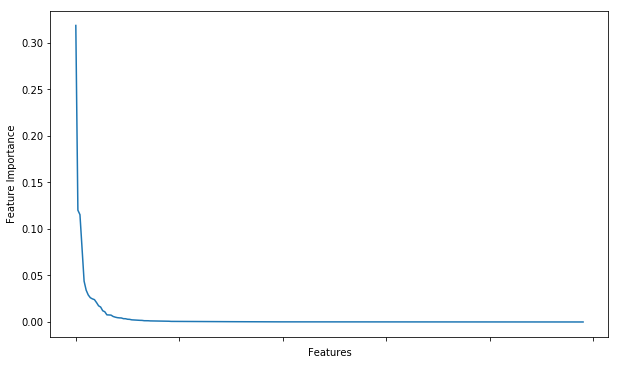

In [120]:
fi = rf_feature_importances(model, trainX)
ax = fi.plot('column', 'importance', figsize=(10,6), legend=False);
ax.set_ylabel("Feature Importance");
ax.set_xlabel("Features");

25

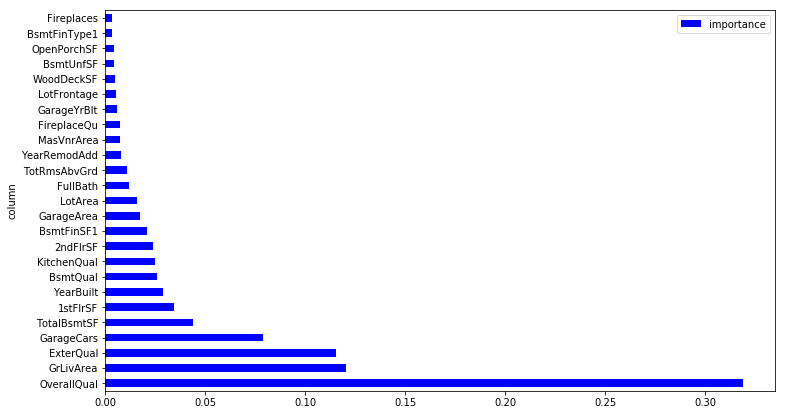

In [121]:
def plot_fi(fi):
    return fi.plot('column','importance','barh', color='b', figsize=(12,7))

plot_fi(fi[fi.importance > 0.003]);
len(fi[fi.importance > 0.003])

As we can see only around 25 features have importance over 0.003, meaning that they have some effect on the model performance. After getting feature importances, we can try if model performance suffers from using only those most important features.

In [122]:
# Only keep features with importance over 0.003
keep_features = fi[fi.importance >= 0.003].column

trainX = df[keep_features].copy()
print(trainX.shape, trainY.shape, "\n")

model = RandomForestRegressor(n_estimators=1000, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
model.fit(trainX, trainY)
print_score(model)

(1460, 25) (1460,) 

[training set rmsle, training set r², out-of-bag r²]

[0.0885062917127823, 0.9549374511218154, 0.8605693684503306]


As we can see removing these redundant features (from 247 features to around 25) didn't have significant effect on model performance. This is due to fact that even if the model has less features to use, the propability to include important feature to individual tree increases.

In [123]:
# Turning trainY into dataframe for storage
trainY = pd.DataFrame(trainY)

# Saving both X and y to their own files
trainX.to_csv('../data/train-kbest', index=False)
trainY.to_csv('../data/trainY', index=False)

## EDA of Important Features

In [124]:
trainX = pd.read_csv('../data/train-kbest')
trainY = pd.read_csv('../data/trainY')

We can now run feature importances again. By removing uninformative features that don't contribute to model performance, we are also reducing colinearity, meaning that we have less predictive features that are correlated. Reducing colinearity makes feature importances clearer since importance is attributed to single feature instead of many.

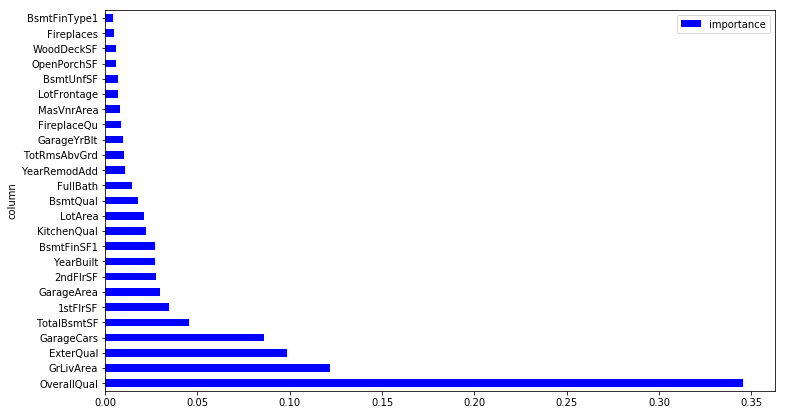

In [125]:
fi = rf_feature_importances(model, trainX)
plot_fi(fi);

Feature importances didn't change much, but there seems to have been some colinearity that I was able to remove. There are few features that have relatively high importance. These features seem to have lot to do with quality and size of different parts of houses which makes sense.

Biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables!!

Correlation matrix, Scatter plots with feature and SalePrice, distributions of feature values

Hyperparameter tuning with grid search:

estimators: 20, 40, 50, 70, 100, 1000
min_samples_leaf: 1, 3, 5, 10
max_features: None, 0.5, sqrt